## RNN ve LSTM yardımı ile NETFLIX Hisse Senedi fiyatlarının tahmini 


---



Bu Colab Notebook'u içerisinde Netflix Hisse Senedi fiyatlarını RNN ve LSTM yardımı ile tahmin edebilecek bir model train etmeye çalışıyoruz.



---


# Gerekli kütüphaneler ve verisetinin aktarılması

Bu projede ihtiyaç duyulan kütüphaneleri alt hücrede tanımlıyoruz, kütüphaneler ile ilgili gerekli açıklamaları raporumuza ekledik.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

Alt hücrede bulunan yükleme aracı yardımı ile veri setimizi Colab'e yüklüyoruz.

In [ ]:
# importing the dataset
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
netflix_stock_data = pd.read_csv('/content/NFLX.csv')

Alt tarafta bulunan **.head()** ve **.tail()** fonksiyonları veri setimizin ilk ve son verilerini göstermede yardımcı olmaktadır. Parametre vermediğimiz zaman 5 değer gösterirken, parametre ile bu sayıyı değiştirebiliyoruz.

In [ ]:
netflix_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [ ]:
netflix_stock_data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
5034,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600
5035,2022-05-23,186.149994,187.660004,177.889999,187.440002,187.440002,9602000
5036,2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400
5037,2022-05-25,180.279999,188.869995,180.169998,187.830002,187.830002,8522100
5038,2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700




---

Veri setimiz ile ilgili bilgiyi ekrana bastırıyoruz.





In [ ]:
netflix_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


Veri setinin kaç satır ve sütundan oluştuğunu göstermeye çalışıyoruz.

In [ ]:
rowsCount, columnsCount =netflix_stock_data.shape
print("Veri setinde",rowsCount,"satır ve ",columnsCount," sütun bulunmaktadır.")

Veri setinde 5044 satır ve  7  sütun bulunmaktadır.


Veri setimizin %80'lik kısmının adet sayısını daha sonra, veri setini ikiye ayırırken kullanmak üzere ekrana bastırıyoruz.

In [ ]:
trainNum = round(rowsCount/10)*8
print(trainNum)

4032


Bulduğumuz 4032 değerinin setin içerisinde hangi tarihe denk geldiğini gözlemliyoruz.

In [ ]:
print(netflix_stock_data.iloc[4032,0])

2018-05-30


Veri setini train ve test olmak üzere iki parçaya ayırıyoruz.

In [ ]:
# Making train and test data
data_train = netflix_stock_data[netflix_stock_data['Date']<'2018-05-30'].copy()
data_test = netflix_stock_data[netflix_stock_data['Date']>='2018-05-30'].copy()
data_training=data_train.copy()

In [ ]:
# Dropping 'Date' and 'Adj Close'
data_train = data_train.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(4032, 5)
(1012, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_train= sc.fit_transform(data_train)
data_train

array([[0.00221738, 0.00233952, 0.00229361, 0.00234691, 0.32341447],
       [0.00238216, 0.00228932, 0.00244119, 0.00238559, 0.03348267],
       [0.00238012, 0.0023094 , 0.00232641, 0.00223496, 0.01957055],
       ...,
       [0.97960822, 0.99409595, 0.97787559, 0.99430065, 0.04479024],
       [0.99544316, 0.99510803, 1.        , 1.        , 0.023309  ],
       [1.        , 1.        , 0.99391651, 0.99555451, 0.02919056]])

In [ ]:
X_train = []
y_train = []

for i in range(60, data_train.shape[0]):
    X_train.append(data_train[i-60:i])
    y_train.append(data_train[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3972, 60, 5)
(3972,)


# RNN MODELİ

In [ ]:
# Importing the Keras libraries and packages

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting 

In [ ]:
# Initialising the RNN
model1 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model1.add(SimpleRNN(units = 60,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model1.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
model1.add(SimpleRNN(units = 60))
model1.add(Dropout(0.2))

# Adding the output layer
model1.add(Dense(units = 1))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 60)            3960      
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60)                7260      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 11,281
Trainable params: 11,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
model1.fit(X_train, y_train, epochs =5, batch_size = 32)

Epoch 1/5
125/125 [==============================] - 5s 29ms/step - loss: 0.0136
Epoch 2/5
125/125 [==============================] - 4s 29ms/step - loss: 0.0030
Epoch 3/5
125/125 [==============================] - 4s 29ms/step - loss: 0.0020
Epoch 4/5
125/125 [==============================] - 4s 29ms/step - loss: 0.0015
Epoch 5/5
125/125 [==============================] - 4s 29ms/step - loss: 0.0010


In [ ]:
#Prepare test data
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4032,2018-05-30,352.369995,354.000000,349.260010,353.540009,353.540009,5685500
4033,2018-05-31,353.799988,355.529999,350.209991,351.600006,351.600006,6921700
4034,2018-06-01,353.880005,359.989990,352.820007,359.929993,359.929993,7112300
4035,2018-06-04,362.679993,363.000000,355.510010,361.809998,361.809998,7682000
4036,2018-06-05,363.320007,369.829987,361.410004,365.799988,365.799988,8358000


In [ ]:
past_60_days = data_training.tail(60)

In [ ]:
data_test = past_60_days.append(data_test, ignore_index = True)
# Dropping 'Date' and 'Adj Close'
data_test = data_test.drop(['Date', 'Adj Close'], axis = 1)
data_test.head(65)

,Open,High,Low,Close,Volume
0,302.850006,316.910004,297.600006,315.000000,18986100
1,319.880005,325.790009,316.500000,325.220001,18525800
2,320.000000,323.739990,314.549988,321.160004,17132200
3,322.200012,322.920013,314.130005,317.000000,11340100
4,321.329987,331.440002,320.230011,331.440002,14500200
...,...,...,...,...,...
60,352.369995,354.000000,349.260010,353.540009,5685500
61,353.799988,355.529999,350.209991,351.600006,6921700
62,353.880005,359.989990,352.820007,359.929993,7112300
63,362.679993,363.000000,355.510010,361.809998,7682000


In [ ]:
# Scaling test data
data_test = sc.transform(data_test)
data_test

array([[0.86144424, 0.88981956, 0.85299168, 0.89658525, 0.05787328],
       [0.90994588, 0.91478519, 0.90722665, 0.92570894, 0.05644877],
       [0.91028763, 0.90902168, 0.90163094, 0.91413926, 0.05213593],
       ...,
       [0.56482379, 0.56883717, 0.54898881, 0.54866838, 0.02516213],
       [0.54579909, 0.5765124 , 0.54916098, 0.58337741, 0.02889718],
       [0.56892493, 0.56942755, 0.5673254 , 0.56596589, 0.02134167]])

In [ ]:
X_test = []
y_test = []

for i in range(60, data_test.shape[0]):
    X_test.append(data_test[i-60:i])
    y_test.append(data_test[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1012, 60, 5), (1012,))

In [ ]:
#predictions
y_pred1 = model1.predict(X_test)
y_pred1.shape

(1012, 1)

In [ ]:
sc.scale_

array([2.84801178e-03, 2.81144252e-03, 2.86957584e-03, 2.84967547e-03,
       3.09474500e-09])

In [ ]:
scale = 1/2.84801178e-03
scale

351.1221431815847

In [ ]:
y_pred1 = y_pred1*scale
y_test = y_test*scale

In [ ]:
y_test[1:3]

array([353.42213118, 353.50214818])

In [ ]:
model1.evaluate(X_train, y_train)

125/125 [==============================] - 1s 9ms/step - loss: 1.0363e-04


0.00010362553439335898

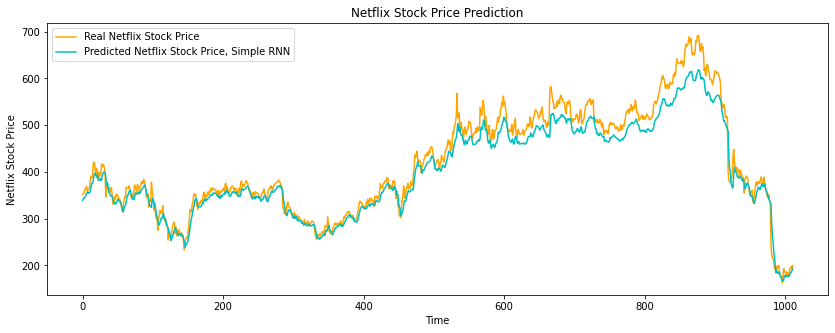

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'orange', label = 'Real Netflix Stock Price')
plt.plot(y_pred1, color = "c", label = 'Predicted Netflix Stock Price, Simple RNN')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

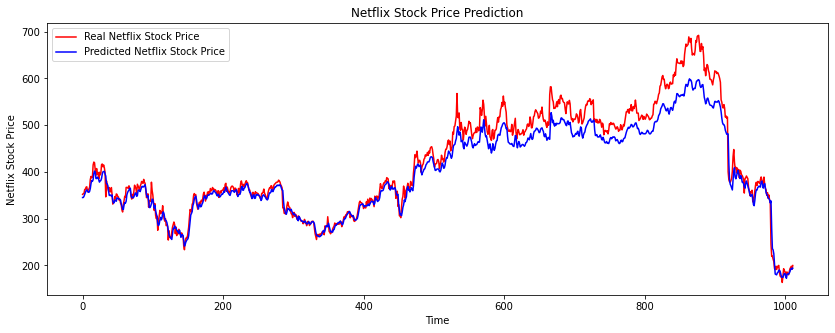

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Netflix Stock Price')
plt.plot(y_pred1, color = 'blue', label = 'Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

# LSTM MODELİ

In [ ]:
from tensorflow.keras.layers import LSTM
# define an object (inilitizing RNN)
model2 = tf.keras.models.Sequential()

In [ ]:
#Initializing the RNN
model2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model2.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model2.add(Dropout(0.2))
# Adding a second RNN layer and some Dropout regularisation.
model2.add(LSTM(units = 60, activation = 'relu'))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout_4 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [ ]:
# compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model2.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
125/125 [==============================] - 28s 178ms/step - loss: 0.0044
Epoch 2/15
125/125 [==============================] - 22s 180ms/step - loss: 0.0010
Epoch 3/15
125/125 [==============================] - 22s 178ms/step - loss: 9.7343e-04
Epoch 4/15
125/125 [==============================] - 22s 176ms/step - loss: 9.9533e-04
Epoch 5/15
125/125 [==============================] - 22s 174ms/step - loss: 7.9733e-04
Epoch 6/15
125/125 [==============================] - 23s 181ms/step - loss: 9.8475e-04
Epoch 7/15
125/125 [==============================] - 23s 183ms/step - loss: 8.7789e-04
Epoch 8/15
125/125 [==============================] - 23s 185ms/step - loss: 8.8750e-04
Epoch 9/15
125/125 [==============================] - 24s 187ms/step - loss: 6.3331e-04
Epoch 10/15
125/125 [==============================] - 23s 183ms/step - loss: 7.9839e-04
Epoch 11/15
125/125 [==============================] - 23s 182ms/step - loss: 6.2979e-04
Epoch 12/15
125/125 [=================

In [ ]:
X_test = []
y_test = []

for i in range(60, data_test.shape[0]):
    X_test.append(data_test[i-60:i])
    y_test.append(data_test[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1012, 60, 5), (1012,))

In [ ]:
#predictions
y_pred2 = model2.predict(X_test)
y_pred2.shape

(1012, 1)

Alttaki hücreler yardımıyla Ölçekleme/Boyut Ayarı yaparak verilerin tekrar gerçek değerlere erişmesi sağlanmaktadır.

In [ ]:
sc.scale_

array([2.84801178e-03, 2.81144252e-03, 2.86957584e-03, 2.84967547e-03,
       3.09474500e-09])

In [ ]:
scale = 1/2.84801178e-03
scale

351.1221431815847

In [ ]:
y_pred2 = y_pred2*scale
y_test = y_test*scale

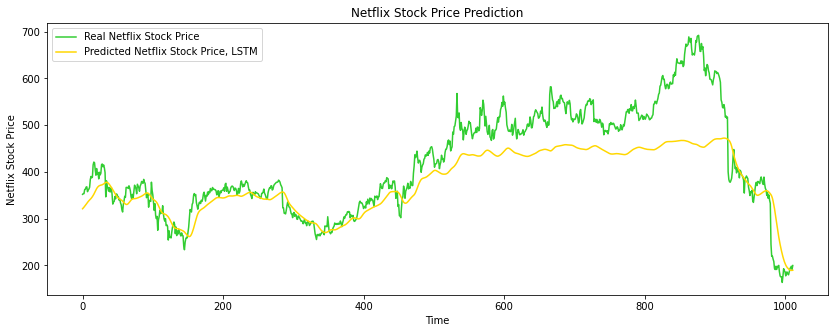

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'LimeGreen', label = 'Real Netflix Stock Price')
plt.plot(y_pred2, color = 'Gold', label = 'Predicted Netflix Stock Price, LSTM')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

# Sonuçların Görselleştirilmesi

Hem RNN hem de LSTM sonuçlarının grafik üzerinde görüntülenmesi.

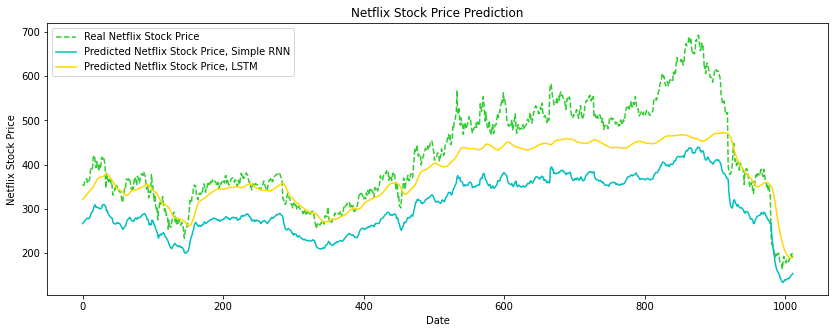

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'LimeGreen',linestyle='dashed', label = 'Real Netflix Stock Price')
plt.plot(y_pred1, color = 'c', label = 'Predicted Netflix Stock Price, Simple RNN')
plt.plot(y_pred2, color = 'Gold', label = 'Predicted Netflix Stock Price, LSTM')
plt.title('Netflix Stock Price Prediction')
plt.xlabel("Date")
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()